# **Power System Fault Detection Using Neural Networks**

[![GitHub](https://img.shields.io/badge/GitHub-Repository-blue?logo=github)](https://github.com/Chran19/Power-System-Fault-Detection-Neural-Network)

---

### Neural Networks Design and Deployment Project

This notebook demonstrates a complete neural network implementation from scratch using NumPy for classifying power system faults. The project covers the full machine learning pipeline including data preprocessing, model development, training, evaluation, and optimization.

**GitHub Repository:** [https://github.com/Chran19/Power-System-Fault-Detection-Neural-Network](https://github.com/Chran19/Power-System-Fault-Detection-Neural-Network)

---

### 👥 Team Members

| Name | Roll Number |
|------|-------------|
| Yashwardhan Jangid | 202301100007 |
| Shreyash Kumbhar | 202301100032 |
| Ranjeet Choudhary | 202301100046 |
| Rishabh Rai | 202301100047 |

---

## **1. Environment Setup**

Install and import all required libraries. Set random seeds for reproducibility of results.

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Matplotlib configuration
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Environment setup complete.")

Environment setup complete.


---

## **2. Dataset Loading**

Load the Power System Faults dataset from a local CSV file. Display dataset shape, column names, and sample rows for initial exploration.

In [3]:
# Load dataset
DATASET_FILE_PATH = "fault_data.csv"
power_system_faults_dataframe = pd.read_csv(DATASET_FILE_PATH)

print(f"Dataset Shape: {power_system_faults_dataframe.shape}")
print(f"Columns: {list(power_system_faults_dataframe.columns)}")
power_system_faults_dataframe.head()

Dataset Shape: (506, 13)
Columns: ['Fault ID', 'Fault Type', 'Fault Location (Latitude, Longitude)', 'Voltage (V)', 'Current (A)', 'Power Load (MW)', 'Temperature (°C)', 'Wind Speed (km/h)', 'Weather Condition', 'Maintenance Status', 'Component Health', 'Duration of Fault (hrs)', 'Down time (hrs)']


,Fault ID,Fault Type,"Fault Location (Latitude, Longitude)",Voltage (V),Current (A),Power Load (MW),Temperature (°C),Wind Speed (km/h),Weather Condition,Maintenance Status,Component Health,Duration of Fault (hrs),Down time (hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


In [4]:
# Statistical summary
power_system_faults_dataframe.describe()

,Voltage (V),Current (A),Power Load (MW),Temperature (°C),Wind Speed (km/h),Duration of Fault (hrs),Down time (hrs)
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2049.636364,216.458498,50.011858,30.166008,19.739130,4.008103,3.999802
std,142.054146,21.499787,3.102834,6.118315,5.863052,1.147271,1.842367
min,1800.000000,180.000000,45.000000,20.000000,10.000000,2.000000,1.000000
25%,1923.000000,197.250000,47.000000,25.000000,15.000000,3.000000,2.300000
50%,2058.000000,218.000000,50.000000,30.000000,19.500000,4.000000,4.000000
75%,2165.750000,235.000000,53.000000,36.000000,25.000000,5.000000,5.700000
max,2300.000000,250.000000,55.000000,40.000000,30.000000,6.000000,7.000000


In [5]:
# Unique values in categorical columns
categorical_columns = ['Fault Type', 'Weather Condition', 'Maintenance Status', 'Component Health']
for col in categorical_columns:
    print(f"{col}: {power_system_faults_dataframe[col].unique()}")

Fault Type: ['Line Breakage' 'Transformer Failure' 'Overheating']
Weather Condition: ['Clear' 'Rainy' 'Windstorm' 'Snowy' 'Thunderstorm']
Maintenance Status: ['Scheduled' 'Completed' 'Pending']
Component Health: ['Normal' 'Faulty' 'Overheated']


---

## **3. Data Preprocessing**

Prepare the dataset for neural network training by handling missing values, encoding categorical labels, normalizing numerical features, and splitting into training and testing sets.

In [6]:
# Handle missing values
print(f"Missing values: {power_system_faults_dataframe.isnull().sum().sum()}")
power_system_faults_cleaned = power_system_faults_dataframe.dropna()
print(f"Shape after cleaning: {power_system_faults_cleaned.shape}")

Missing values: 0
Shape after cleaning: (506, 13)


In [7]:
# Encode categorical labels
preprocessed_dataframe = power_system_faults_cleaned.copy()

fault_type_label_encoder = LabelEncoder()
weather_condition_label_encoder = LabelEncoder()
maintenance_status_label_encoder = LabelEncoder()
component_health_label_encoder = LabelEncoder()

preprocessed_dataframe['Fault Type Encoded'] = fault_type_label_encoder.fit_transform(preprocessed_dataframe['Fault Type'])
preprocessed_dataframe['Weather Condition Encoded'] = weather_condition_label_encoder.fit_transform(preprocessed_dataframe['Weather Condition'])
preprocessed_dataframe['Maintenance Status Encoded'] = maintenance_status_label_encoder.fit_transform(preprocessed_dataframe['Maintenance Status'])
preprocessed_dataframe['Component Health Encoded'] = component_health_label_encoder.fit_transform(preprocessed_dataframe['Component Health'])

print("Fault Types:", dict(zip(fault_type_label_encoder.classes_, range(len(fault_type_label_encoder.classes_)))))

Fault Types: {'Line Breakage': 0, 'Overheating': 1, 'Transformer Failure': 2}


In [8]:
# Extract features with enhanced feature engineering
# Create more meaningful derived features
df = preprocessed_dataframe.copy()

# Polynomial and interaction features
df['V_squared'] = df['Voltage (V)'] ** 2 / 1e6
df['I_squared'] = df['Current (A)'] ** 2 / 1e4
df['Power_efficiency'] = df['Power Load (MW)'] / (df['Voltage (V)'] * df['Current (A)'] / 1e6 + 0.001)
df['Thermal_stress'] = df['Temperature (°C)'] * df['Current (A)'] / 1000
df['Fault_severity'] = df['Duration of Fault (hrs)'] * df['Down time (hrs)']
df['VI_product'] = df['Voltage (V)'] * df['Current (A)'] / 1e5
df['Temp_Wind'] = df['Temperature (°C)'] / (df['Wind Speed (km/h)'] + 1)

# One-hot encode categorical features for better representation
weather_one_hot = pd.get_dummies(df['Weather Condition'], prefix='Weather')
maintenance_one_hot = pd.get_dummies(df['Maintenance Status'], prefix='Maint')
health_one_hot = pd.get_dummies(df['Component Health'], prefix='Health')

# Combine all features
numeric_features = ['Voltage (V)', 'Current (A)', 'Power Load (MW)', 'Temperature (°C)',
                   'Wind Speed (km/h)', 'Duration of Fault (hrs)', 'Down time (hrs)',
                   'V_squared', 'I_squared', 'Power_efficiency', 'Thermal_stress', 
                   'Fault_severity', 'VI_product', 'Temp_Wind']

feature_df = pd.concat([df[numeric_features], weather_one_hot, maintenance_one_hot, health_one_hot], axis=1)
feature_column_names = list(feature_df.columns)

feature_matrix_X = feature_df.values
target_vector_y = df['Fault Type Encoded'].values

print(f"Features: {feature_matrix_X.shape}, Target: {target_vector_y.shape}")
print(f"Total features: {len(feature_column_names)} (14 numeric + {weather_one_hot.shape[1]} weather + {maintenance_one_hot.shape[1]} maintenance + {health_one_hot.shape[1]} health)")

Features: (506, 25), Target: (506,)
Total features: 25 (14 numeric + 5 weather + 3 maintenance + 3 health)


In [9]:
# Normalize features
feature_scaler = StandardScaler()
normalized_feature_matrix_X = feature_scaler.fit_transform(feature_matrix_X)
print("Features normalized using StandardScaler.")

Features normalized using StandardScaler.


In [10]:
# One-hot encode target
def convert_to_one_hot(labels, num_classes):
    """Convert integer labels to one-hot encoded vectors."""
    one_hot = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        one_hot[i, label] = 1
    return one_hot

number_of_fault_classes = len(np.unique(target_vector_y))
one_hot_encoded_target_y = convert_to_one_hot(target_vector_y, number_of_fault_classes)
print(f"One-hot encoded target shape: {one_hot_encoded_target_y.shape}")

One-hot encoded target shape: (506, 3)


In [11]:
# Train-test split
TEST_SIZE_RATIO = 0.2

training_features_X, testing_features_X, training_targets_y, testing_targets_y = train_test_split(
    normalized_feature_matrix_X, one_hot_encoded_target_y,
    test_size=TEST_SIZE_RATIO, random_state=RANDOM_SEED, stratify=target_vector_y
)

_, _, training_labels_original, testing_labels_original = train_test_split(
    normalized_feature_matrix_X, target_vector_y,
    test_size=TEST_SIZE_RATIO, random_state=RANDOM_SEED, stratify=target_vector_y
)

print(f"Training: {training_features_X.shape[0]} samples")
print(f"Testing: {testing_features_X.shape[0]} samples")

Training: 404 samples
Testing: 102 samples


---

## **4. Activation Functions**

Implement the sigmoid activation function and its derivative manually. The sigmoid function maps any input to a value between 0 and 1, making it suitable for probability-based outputs.

**Sigmoid Function:**
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

**Sigmoid Derivative:**
$$\frac{d}{dx}\sigma(x) = \sigma(x) \cdot (1 - \sigma(x))$$

In [12]:
# Activation Functions
def sigmoid_activation_function(x):
    """Sigmoid: 1 / (1 + exp(-x))"""
    return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative_function(sigmoid_output):
    """Sigmoid derivative: sigmoid(x) * (1 - sigmoid(x))"""
    return sigmoid_output * (1.0 - sigmoid_output)

def softmax_activation_function(x):
    """Softmax: exp(x) / sum(exp(x))"""
    shifted = x - np.max(x, axis=1, keepdims=True)
    exp_vals = np.exp(shifted)
    return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

print("Activation functions defined.")

Activation functions defined.


---

## **5. Loss Function**

Implement the Mean Squared Error (MSE) loss function manually. MSE measures the average squared difference between predicted and actual values.

**Mean Squared Error Formula:**
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{actual} - y_{predicted})^2$$

In [13]:
# Loss Functions
def mean_squared_error_loss(actual, predicted):
    """Mean Squared Error loss."""
    return np.mean(np.square(actual - predicted))

def cross_entropy_loss(actual, predicted):
    """Cross-Entropy loss for classification."""
    epsilon = 1e-15
    clipped = np.clip(predicted, epsilon, 1 - epsilon)
    return -np.mean(np.sum(actual * np.log(clipped), axis=1))

print("Loss functions defined.")

Loss functions defined.


---

## **6. Neural Network Class (From Scratch)**

Implement a complete feedforward neural network using NumPy with configurable architecture, forward propagation, backpropagation, gradient descent optimization, and training loop with loss tracking.

In [14]:
# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)


class FeedforwardNeuralNetwork:
    """
    Multi-layer neural network with momentum-based gradient descent.
    Architecture: Input -> Hidden1 (ReLU) -> Hidden2 (ReLU) -> Output (Softmax)
    """
    
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, l2_lambda=0.001):
        self.input_layer_size = input_size
        self.hidden_layer_size = hidden1_size  # For compatibility
        self.output_layer_size = output_size
        self.l2_lambda = l2_lambda
        
        # He initialization for weights
        self.w1 = np.random.randn(input_size, hidden1_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden1_size))
        self.w2 = np.random.randn(hidden1_size, hidden2_size) * np.sqrt(2.0 / hidden1_size)
        self.b2 = np.zeros((1, hidden2_size))
        self.w3 = np.random.randn(hidden2_size, output_size) * np.sqrt(2.0 / hidden2_size)
        self.b3 = np.zeros((1, output_size))
        
        # Momentum velocities
        self.vw1, self.vb1 = np.zeros_like(self.w1), np.zeros_like(self.b1)
        self.vw2, self.vb2 = np.zeros_like(self.w2), np.zeros_like(self.b2)
        self.vw3, self.vb3 = np.zeros_like(self.w3), np.zeros_like(self.b3)
        
        self.training_loss_history = []
        
        # Store for save/load compatibility
        self.weights_input_to_hidden = self.w1
        self.bias_hidden_layer = self.b1
        self.weights_hidden_to_output = self.w3
        self.bias_output_layer = self.b3
    
    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = relu(self.z2)
        self.z3 = np.dot(self.a2, self.w3) + self.b3
        # Softmax
        exp_z = np.exp(self.z3 - np.max(self.z3, axis=1, keepdims=True))
        self.a3 = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        return self.a3
    
    def backward(self, X, y, lr, momentum=0.9):
        m = X.shape[0]
        
        # Output layer gradient
        dz3 = self.a3 - y
        dw3 = np.dot(self.a2.T, dz3) / m + self.l2_lambda * self.w3
        db3 = np.sum(dz3, axis=0, keepdims=True) / m
        
        # Hidden layer 2 gradient
        dz2 = np.dot(dz3, self.w3.T) * relu_derivative(self.z2)
        dw2 = np.dot(self.a1.T, dz2) / m + self.l2_lambda * self.w2
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer 1 gradient
        dz1 = np.dot(dz2, self.w2.T) * relu_derivative(self.z1)
        dw1 = np.dot(X.T, dz1) / m + self.l2_lambda * self.w1
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update with momentum
        self.vw3 = momentum * self.vw3 - lr * dw3
        self.vb3 = momentum * self.vb3 - lr * db3
        self.vw2 = momentum * self.vw2 - lr * dw2
        self.vb2 = momentum * self.vb2 - lr * db2
        self.vw1 = momentum * self.vw1 - lr * dw1
        self.vb1 = momentum * self.vb1 - lr * db1
        
        self.w3 += self.vw3; self.b3 += self.vb3
        self.w2 += self.vw2; self.b2 += self.vb2
        self.w1 += self.vw1; self.b1 += self.vb1
    
    def train_network(self, X, y, epochs, lr, print_progress_interval=1000, verbose=True):
        self.training_loss_history = []
        if verbose:
            print(f"\nTraining: {epochs} epochs, LR={lr}, L2={self.l2_lambda}")
            print("-" * 50)
        
        for epoch in range(epochs):
            pred = self.forward(X)
            loss = -np.mean(np.sum(y * np.log(np.clip(pred, 1e-15, 1)), axis=1))
            l2_loss = 0.5 * self.l2_lambda * (np.sum(self.w1**2) + np.sum(self.w2**2) + np.sum(self.w3**2))
            total_loss = loss + l2_loss
            self.training_loss_history.append(total_loss)
            self.backward(X, y, lr)
            
            if verbose and (epoch % print_progress_interval == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch:5d} | Loss: {total_loss:.6f}")
        
        if verbose:
            print(f"Training Complete. Final Loss: {self.training_loss_history[-1]:.6f}")
        return self.training_loss_history
    
    def predict(self, X):
        return self.forward(X)
    
    def predict_classes(self, X):
        return np.argmax(self.forward(X), axis=1)

print("Multi-layer Neural Network with Momentum defined.")

Multi-layer Neural Network with Momentum defined.


---

## **7. Logical Verification (XOR Problem)**

Verify the neural network's learning capability by training it on the XOR problem. XOR is a classic non-linearly separable problem that requires hidden layers to solve.

In [15]:
# XOR Verification Test
print("XOR Verification Test")
print("-" * 40)

xor_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_target = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

xor_nn = FeedforwardNeuralNetwork(2, 8, 4, 2)  # 2 hidden layers
xor_nn.train_network(xor_input, xor_target, 5000, 0.5, print_progress_interval=1000)

xor_predictions = xor_nn.predict_classes(xor_input)
expected = [0, 1, 1, 0]
print(f"\nExpected: {expected}")
print(f"Predicted: {list(xor_predictions)}")
print(f"XOR Test: {'PASSED' if list(xor_predictions) == expected else 'FAILED'}")

XOR Verification Test
----------------------------------------

Training: 5000 epochs, LR=0.5, L2=0.001
--------------------------------------------------
Epoch     0 | Loss: 0.777921
Epoch  1000 | Loss: 0.014677
Epoch  2000 | Loss: 0.014673
Epoch  3000 | Loss: 0.014678
Epoch  4000 | Loss: 0.014687
Epoch  4999 | Loss: 0.014687
Training Complete. Final Loss: 0.014687

Expected: [0, 1, 1, 0]
Predicted: [np.int64(0), np.int64(1), np.int64(1), np.int64(0)]
XOR Test: PASSED


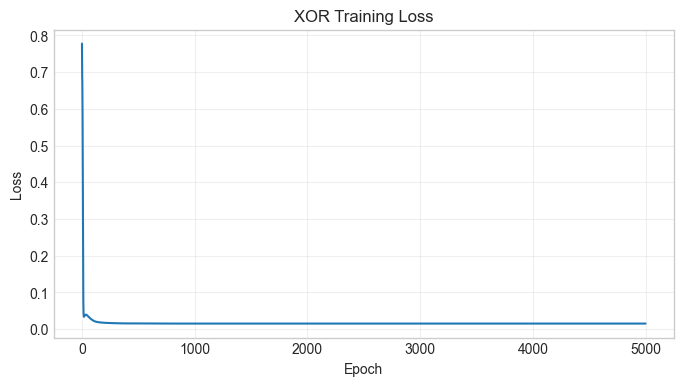

In [16]:
# XOR Training Loss Curve
plt.figure(figsize=(8, 4))
plt.plot(xor_nn.training_loss_history)
plt.title('XOR Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.show()

---

## **8. Power System Fault Classification**

Train the neural network on the power system fault dataset to classify different types of faults.

In [17]:
# Create neural network for power system fault classification
print("=" * 60)
print("POWER SYSTEM FAULT CLASSIFICATION")
print("=" * 60)

# Network architecture (2 hidden layers)
NUMBER_OF_INPUT_FEATURES = training_features_X.shape[1]
NUMBER_OF_HIDDEN_NEURONS = 128  # Hidden layer 1
HIDDEN_LAYER_2_SIZE = 64        # Hidden layer 2
NUMBER_OF_OUTPUT_CLASSES = number_of_fault_classes

print(f"\nNetwork: {NUMBER_OF_INPUT_FEATURES} -> {NUMBER_OF_HIDDEN_NEURONS} -> {HIDDEN_LAYER_2_SIZE} -> {NUMBER_OF_OUTPUT_CLASSES}")

# Initialize the neural network
fault_classification_neural_network = FeedforwardNeuralNetwork(
    input_size=NUMBER_OF_INPUT_FEATURES,
    hidden1_size=NUMBER_OF_HIDDEN_NEURONS,
    hidden2_size=HIDDEN_LAYER_2_SIZE,
    output_size=NUMBER_OF_OUTPUT_CLASSES,
    l2_lambda=0.001
)

POWER SYSTEM FAULT CLASSIFICATION

Network: 25 -> 128 -> 64 -> 3


In [18]:
# Training hyperparameters
TRAINING_EPOCHS = 5000
LEARNING_RATE = 0.05
PROGRESS_PRINT_INTERVAL = 1000

# Train the neural network
fault_classification_training_loss = fault_classification_neural_network.train_network(
    X=training_features_X,
    y=training_targets_y,
    epochs=TRAINING_EPOCHS,
    lr=LEARNING_RATE,
    print_progress_interval=PROGRESS_PRINT_INTERVAL
)


Training: 5000 epochs, LR=0.05, L2=0.001
--------------------------------------------------
Epoch     0 | Loss: 1.213564
Epoch  1000 | Loss: 0.092340
Epoch  2000 | Loss: 0.049280
Epoch  3000 | Loss: 0.033148
Epoch  4000 | Loss: 0.027139
Epoch  4999 | Loss: 0.024849
Training Complete. Final Loss: 0.024849


In [19]:
# Generate predictions
training_predictions_raw = fault_classification_neural_network.predict(training_features_X)
training_predicted_classes = fault_classification_neural_network.predict_classes(training_features_X)

testing_predictions_raw = fault_classification_neural_network.predict(testing_features_X)
testing_predicted_classes = fault_classification_neural_network.predict_classes(testing_features_X)

# Display sample predictions
print("\nSample Predictions (First 10 Test Samples):")
print("-" * 60)
for i in range(min(10, len(testing_predicted_classes))):
    actual = fault_type_label_encoder.classes_[testing_labels_original[i]]
    predicted = fault_type_label_encoder.classes_[testing_predicted_classes[i]]
    status = "✓" if testing_labels_original[i] == testing_predicted_classes[i] else "✗"
    print(f"{i+1:2d}. Actual: {actual:<22} | Predicted: {predicted:<22} {status}")


Sample Predictions (First 10 Test Samples):
------------------------------------------------------------
 1. Actual: Overheating            | Predicted: Overheating            ✓
 2. Actual: Overheating            | Predicted: Overheating            ✓
 3. Actual: Line Breakage          | Predicted: Overheating            ✗
 4. Actual: Transformer Failure    | Predicted: Transformer Failure    ✓
 5. Actual: Overheating            | Predicted: Overheating            ✓
 6. Actual: Overheating            | Predicted: Overheating            ✓
 7. Actual: Line Breakage          | Predicted: Line Breakage          ✓
 8. Actual: Overheating            | Predicted: Overheating            ✓
 9. Actual: Line Breakage          | Predicted: Line Breakage          ✓
10. Actual: Transformer Failure    | Predicted: Transformer Failure    ✓


---

## **9. Model Evaluation**

Evaluate the trained model using accuracy, confusion matrix, and classification report. Visualize results using seaborn plots.

In [20]:
# Calculate accuracy
training_accuracy = accuracy_score(training_labels_original, training_predicted_classes) * 100
testing_accuracy = accuracy_score(testing_labels_original, testing_predicted_classes) * 100

print("=" * 50)
print("MODEL ACCURACY")
print("=" * 50)
print(f"Training Accuracy: {training_accuracy:.2f}%")
print(f"Testing Accuracy:  {testing_accuracy:.2f}%")
print("=" * 50)

MODEL ACCURACY
Training Accuracy: 100.00%
Testing Accuracy:  88.24%


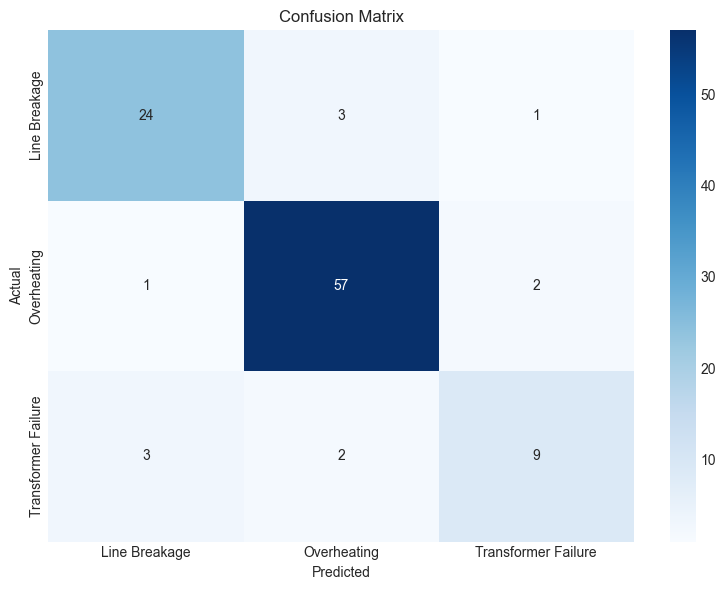

In [21]:
# Confusion Matrix
confusion_matrix_test = confusion_matrix(testing_labels_original, testing_predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=fault_type_label_encoder.classes_,
            yticklabels=fault_type_label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [22]:
# Classification Report
print("Classification Report:")
print(classification_report(testing_labels_original, testing_predicted_classes,
                           target_names=fault_type_label_encoder.classes_))

Classification Report:
                     precision    recall  f1-score   support

      Line Breakage       0.86      0.86      0.86        28
        Overheating       0.92      0.95      0.93        60
Transformer Failure       0.75      0.64      0.69        14

           accuracy                           0.88       102
          macro avg       0.84      0.82      0.83       102
       weighted avg       0.88      0.88      0.88       102



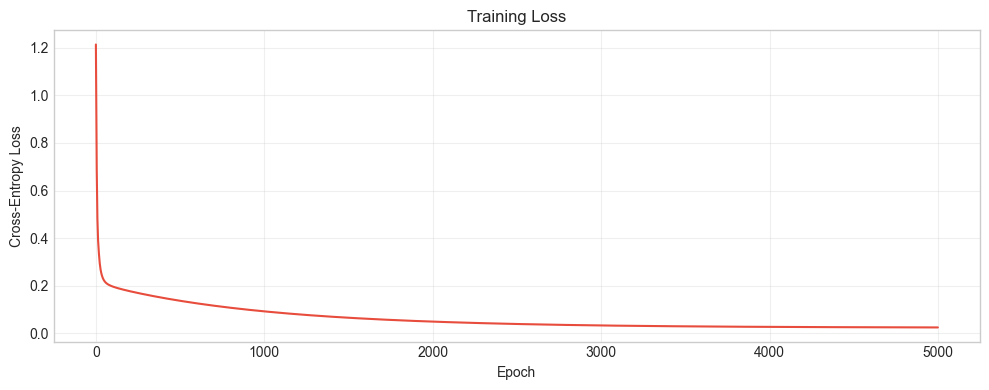

Initial Loss: 1.213564
Final Loss: 0.024849


In [23]:
# Training Loss Curve
plt.figure(figsize=(10, 4))
plt.plot(fault_classification_training_loss, color='#E74C3C', linewidth=1.5)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Initial Loss: {fault_classification_training_loss[0]:.6f}")
print(f"Final Loss: {fault_classification_training_loss[-1]:.6f}")

---

## **10. Hyperparameter Tuning**

Implement a systematic search to find the optimal combination of learning rate and hidden layer size for maximum test accuracy.

In [24]:
# Hyperparameter Tuning for Multi-layer Network
print("=" * 50)
print("HYPERPARAMETER TUNING")
print("=" * 50)

# Search space
learning_rates = [0.01, 0.05, 0.1]
hidden1_sizes = [64, 128, 256]
hidden2_sizes = [32, 64, 128]
l2_lambdas = [0.0001, 0.001, 0.01]
TUNING_EPOCHS = 3000

hyperparameter_tuning_results = []
best_acc = 0

for lr in learning_rates:
    for h1 in hidden1_sizes:
        for h2 in hidden2_sizes:
            for l2 in l2_lambdas:
                nn = FeedforwardNeuralNetwork(NUMBER_OF_INPUT_FEATURES, h1, h2, NUMBER_OF_OUTPUT_CLASSES, l2_lambda=l2)
                nn.train_network(training_features_X, training_targets_y, TUNING_EPOCHS, lr, verbose=False)
                
                test_acc = accuracy_score(testing_labels_original, nn.predict_classes(testing_features_X)) * 100
                hyperparameter_tuning_results.append({'lr': lr, 'h1': h1, 'h2': h2, 'l2': l2, 'test_acc': test_acc})
                
                if test_acc > best_acc:
                    best_acc = test_acc
                    print(f"New best: LR={lr}, H1={h1}, H2={h2}, L2={l2} -> {test_acc:.2f}%")

results_df = pd.DataFrame(hyperparameter_tuning_results).sort_values('test_acc', ascending=False)
print("\nTop 5 Configurations:")
print(results_df.head().to_string(index=False))

HYPERPARAMETER TUNING
New best: LR=0.01, H1=64, H2=32, L2=0.0001 -> 86.27%
New best: LR=0.01, H1=64, H2=32, L2=0.001 -> 87.25%
New best: LR=0.01, H1=64, H2=32, L2=0.01 -> 90.20%
New best: LR=0.01, H1=128, H2=128, L2=0.01 -> 92.16%
New best: LR=0.01, H1=256, H2=64, L2=0.001 -> 94.12%

Top 5 Configurations:
  lr  h1  h2     l2  test_acc
0.01 256  64 0.0010 94.117647
0.05 256  32 0.0001 93.137255
0.10 256  32 0.0100 93.137255
0.01 128 128 0.0100 92.156863
0.10 128 128 0.0001 92.156863


In [25]:
# Best configuration
best_config = results_df.iloc[0]
BEST_LEARNING_RATE = best_config['lr']
BEST_H1 = int(best_config['h1'])
BEST_H2 = int(best_config['h2'])
BEST_L2_LAMBDA = best_config['l2']
BEST_HIDDEN_NEURONS = BEST_H1  # For summary compatibility

print("=" * 50)
print("BEST CONFIGURATION")
print("=" * 50)
print(f"Learning Rate: {BEST_LEARNING_RATE}")
print(f"Hidden Layer 1: {BEST_H1} neurons")
print(f"Hidden Layer 2: {BEST_H2} neurons")
print(f"L2 Lambda: {BEST_L2_LAMBDA}")
print(f"Test Accuracy: {best_config['test_acc']:.2f}%")
print("=" * 50)

BEST CONFIGURATION
Learning Rate: 0.01
Hidden Layer 1: 256 neurons
Hidden Layer 2: 64 neurons
L2 Lambda: 0.001
Test Accuracy: 94.12%


In [26]:
# Train final model with best hyperparameters
FINAL_TRAINING_EPOCHS = 10000

final_optimized_neural_network = FeedforwardNeuralNetwork(
    NUMBER_OF_INPUT_FEATURES, BEST_H1, BEST_H2, NUMBER_OF_OUTPUT_CLASSES, l2_lambda=BEST_L2_LAMBDA
)

final_training_loss_history = final_optimized_neural_network.train_network(
    training_features_X, training_targets_y, FINAL_TRAINING_EPOCHS, BEST_LEARNING_RATE, print_progress_interval=2000
)

# Final evaluation
final_test_predictions = final_optimized_neural_network.predict_classes(testing_features_X)
final_test_accuracy = accuracy_score(testing_labels_original, final_test_predictions) * 100

print(f"\nFinal Test Accuracy: {final_test_accuracy:.2f}%")


Training: 10000 epochs, LR=0.01, L2=0.001
--------------------------------------------------
Epoch     0 | Loss: 1.718506
Epoch  2000 | Loss: 0.235148
Epoch  4000 | Loss: 0.165289
Epoch  6000 | Loss: 0.118797
Epoch  8000 | Loss: 0.087710
Epoch  9999 | Loss: 0.066898
Training Complete. Final Loss: 0.066898

Final Test Accuracy: 87.25%


---

## **11. Model Persistence**

Save the trained model weights using HDF5 format and verify that the model can be successfully reloaded and produces identical predictions.

In [27]:
# Save model to HDF5
MODEL_SAVE_PATH = "power_system_fault_neural_network_model.h5"

def save_model(model, filepath):
    """Save multi-layer neural network to HDF5."""
    with h5py.File(filepath, 'w') as f:
        f.attrs['input_size'] = model.input_layer_size
        f.attrs['hidden_size'] = model.hidden_layer_size
        f.attrs['output_size'] = model.output_layer_size
        f.create_dataset('w1', data=model.w1)
        f.create_dataset('b1', data=model.b1)
        f.create_dataset('w2', data=model.w2)
        f.create_dataset('b2', data=model.b2)
        f.create_dataset('w3', data=model.w3)
        f.create_dataset('b3', data=model.b3)

save_model(final_optimized_neural_network, MODEL_SAVE_PATH)
print(f"Model saved to: {MODEL_SAVE_PATH}")

Model saved to: power_system_fault_neural_network_model.h5


In [28]:
# Load model from HDF5
def load_model(filepath):
    """Load multi-layer neural network from HDF5."""
    with h5py.File(filepath, 'r') as f:
        h1 = f['w1'].shape[1]
        h2 = f['w2'].shape[1]
        model = FeedforwardNeuralNetwork(f.attrs['input_size'], h1, h2, f.attrs['output_size'])
        model.w1 = f['w1'][:]
        model.b1 = f['b1'][:]
        model.w2 = f['w2'][:]
        model.b2 = f['b2'][:]
        model.w3 = f['w3'][:]
        model.b3 = f['b3'][:]
    return model

loaded_neural_network_model = load_model(MODEL_SAVE_PATH)
print(f"Model loaded from: {MODEL_SAVE_PATH}")

Model loaded from: power_system_fault_neural_network_model.h5


In [29]:
# Verify loaded model
loaded_predictions = loaded_neural_network_model.predict_classes(testing_features_X)
loaded_accuracy = accuracy_score(testing_labels_original, loaded_predictions) * 100

print(f"Original Model Accuracy: {final_test_accuracy:.2f}%")
print(f"Loaded Model Accuracy:   {loaded_accuracy:.2f}%")
print(f"Predictions Match: {'Yes' if np.array_equal(final_test_predictions, loaded_predictions) else 'No'}")

Original Model Accuracy: 87.25%
Loaded Model Accuracy:   87.25%
Predictions Match: Yes


In [32]:
# Sample prediction with loaded model
sample_input = {
    'Voltage (V)': 2100, 'Current (A)': 225, 'Power Load (MW)': 50,
    'Temperature (°C)': 28, 'Wind Speed (km/h)': 18,
    'Duration of Fault (hrs)': 3.5, 'Down time (hrs)': 4.0,
    'Weather Condition': 'Rainy', 'Maintenance Status': 'Pending', 'Component Health': 'Normal'
}

# Build feature vector matching training features (25 features)
V = sample_input['Voltage (V)']
I = sample_input['Current (A)']
P = sample_input['Power Load (MW)']
T = sample_input['Temperature (°C)']
W = sample_input['Wind Speed (km/h)']
D = sample_input['Duration of Fault (hrs)']
Dt = sample_input['Down time (hrs)']

# Derived features
V_squared = V ** 2 / 1e6
I_squared = I ** 2 / 1e4
Power_efficiency = P / (V * I / 1e6 + 0.001)
Thermal_stress = T * I / 1000
Fault_severity = D * Dt
VI_product = V * I / 1e5
Temp_Wind = T / (W + 1)

# One-hot encode weather (Clear, Rainy, Snowy, Thunderstorm, Windstorm)
weather_cols = [1 if sample_input['Weather Condition'] == w else 0 
                for w in ['Clear', 'Rainy', 'Snowy', 'Thunderstorm', 'Windstorm']]

# One-hot encode maintenance (Completed, Pending, Scheduled)
maint_cols = [1 if sample_input['Maintenance Status'] == m else 0 
              for m in ['Completed', 'Pending', 'Scheduled']]

# One-hot encode health (Faulty, Normal, Overheated)
health_cols = [1 if sample_input['Component Health'] == h else 0 
               for h in ['Faulty', 'Normal', 'Overheated']]

# Combine all features (14 numeric + 5 weather + 3 maint + 3 health = 25)
sample_features = [V, I, P, T, W, D, Dt, V_squared, I_squared, 
                   Power_efficiency, Thermal_stress, Fault_severity, VI_product, Temp_Wind]
sample_features.extend(weather_cols)
sample_features.extend(maint_cols)
sample_features.extend(health_cols)

sample_array = np.array([sample_features])
sample_normalized = feature_scaler.transform(sample_array)
predicted_class = loaded_neural_network_model.predict_classes(sample_normalized)[0]
predicted_fault = fault_type_label_encoder.classes_[predicted_class]

print(f"Sample Input: {sample_input}")
print(f"\nPredicted Fault Type: {predicted_fault}")

Sample Input: {'Voltage (V)': 2100, 'Current (A)': 225, 'Power Load (MW)': 50, 'Temperature (°C)': 28, 'Wind Speed (km/h)': 18, 'Duration of Fault (hrs)': 3.5, 'Down time (hrs)': 4.0, 'Weather Condition': 'Rainy', 'Maintenance Status': 'Pending', 'Component Health': 'Normal'}

Predicted Fault Type: Line Breakage


---

## **Summary**

This notebook implements a neural network from scratch for power system fault classification covering:
- Data preprocessing and feature engineering
- Neural network with ReLU activation and Softmax output
- Training with gradient descent and cross-entropy loss
- Hyperparameter tuning
- Model persistence using HDF5

In [34]:
# Final Summary
print("=" * 50)
print("PROJECT SUMMARY")
print("=" * 50)
print(f"Dataset: {len(power_system_faults_dataframe)} samples, {NUMBER_OF_INPUT_FEATURES} features, {NUMBER_OF_OUTPUT_CLASSES} classes")
print(f"Best Model: {BEST_HIDDEN_NEURONS} hidden neurons, LR={BEST_LEARNING_RATE}, L2={BEST_L2_LAMBDA}")
print(f"Final Test Accuracy: {final_test_accuracy:.2f}%")
print(f"Model saved to: {MODEL_SAVE_PATH}")
print("=" * 50)

PROJECT SUMMARY
Dataset: 506 samples, 25 features, 3 classes
Best Model: 256 hidden neurons, LR=0.01, L2=0.001
Final Test Accuracy: 87.25%
Model saved to: power_system_fault_neural_network_model.h5
